In [79]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
d = 100
b = np.random.randn(n)
x0 = np.random.randn(d)
iterations = 1000

def main():
    
    A = np.zeros((5, 100))
    for i in range(5):
        for j in range(100):
            A[i, j] = 10 ** (i - j)
    
    print(f"Condición de A: {condition_number(A)}")

    F, grad_F, F2, grad_F2, s, delta2, cost_svd, norm_svd, deltas2 = initialize_problem(A)

    plot_convergence_cost(x0, grad_F, F, s, iterations, delta2, F2, grad_F2, cost_svd)
    plot_convergence_norm(x0, grad_F, s, iterations, delta2, grad_F2, norm_svd)
    plot_convergence_x(x0, grad_F, s, iterations, delta2, grad_F2)
    plot_cost_with_different_delta2(x0, grad_F2, F2, s, iterations, deltas2)

    I = np.eye(n)
    zeros = np.zeros((n, d - n))
    A = np.hstack((I, zeros))
    
    print(f"Condición de A: {condition_number(A)}")

    F, grad_F, F2, grad_F2, s, delta2, cost_svd, norm_svd, deltas2 = initialize_problem(A)

    plot_convergence_cost(x0, grad_F, F, s, iterations, delta2, F2, grad_F2, cost_svd)
    plot_convergence_norm(x0, grad_F, s, iterations, delta2, grad_F2, norm_svd)
    plot_convergence_x(x0, grad_F, s, iterations, delta2, grad_F2)
    plot_cost_with_different_delta2(x0, grad_F2, F2, s, iterations, deltas2)
   
    A = np.random.randn(n, d)
    print(f"Condición de A: {condition_number(A)}")

    F, grad_F, F2, grad_F2, s, delta2, cost_svd, norm_svd, deltas2 = initialize_problem(A)

    plot_convergence_cost(x0, grad_F, F, s, iterations, delta2, F2, grad_F2, cost_svd)
    plot_convergence_norm(x0, grad_F, s, iterations, delta2, grad_F2, norm_svd)
    plot_convergence_x(x0, grad_F, s, iterations, delta2, grad_F2)
    plot_cost_with_different_delta2(x0, grad_F2, F2, s, iterations, deltas2)

def initialize_problem(A):
    def F(x): return np.dot((A @ x - b).T, A @ x - b)

    def grad_F(x): return 2 * A.T @ (A @ x - b)

    H_F = 2 * A.T @ A

    def F2(x, delta): return F(x) + delta * np.dot(x, x)

    def grad_F2(x, delta): return grad_F(x) + 2 * delta * x

    sigma_max = np.linalg.svd(A, compute_uv=False)[0]
    delta2 = 10**(-2) * sigma_max
    lambda_max = np.linalg.eigvals(H_F).real.max()
    s = 1 / lambda_max
    deltas2 = [10**(-i) * sigma_max for i in range(10, -3, -1)]

    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    x_svd = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
    cost_svd = F(x_svd)
    norm_svd = np.linalg.norm(x_svd)

    return F, grad_F, F2, grad_F2, s, delta2, cost_svd, norm_svd, deltas2

def condition_number(A):
    singular_values = np.linalg.svd(A, compute_uv=False)
    return singular_values.max() / singular_values.min()

def plot_convergence_cost(x0, grad_F, F, s, iterations, delta2, F2, grad_F2, cost_svd):
    x = x0.copy()
    cost_history_F = []
    
    x_reg = x0.copy()
    cost_history_F2 = []

    for _ in range(iterations):
        grad = grad_F(x)
        if np.any(np.isnan(grad)) or np.any(np.isinf(grad)):
            break
        x = x - s * grad
        cost_history_F.append(F(x))

        grad_reg = grad_F2(x_reg, delta2)
        if np.any(np.isnan(grad_reg)) or np.any(np.isinf(grad_reg)):
            break
        x_reg = x_reg - s * grad_reg
        cost_history_F2.append(F2(x_reg, delta2))



    # cmap = plt.cm.get_cmap('viridis')
    # plt.plot(cost_history_F, label='Descenso por gradiente', color=cmap(0.2))
    # plt.plot(cost_history_F2, label='Descenso por gradiente con regularización L2', color=cmap(0.8))

    plt.plot(cost_history_F, label='Descenso por gradiente')
    plt.plot(cost_history_F2, label='Descenso por gradiente con regularización L2')
    plt.axhline(y=cost_svd, color='r', linestyle='--', label='Solución SVD')
    plt.yscale("log")
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.title('Evolución del costo a lo largo de las iteraciones')
    plt.legend(fontsize=15,loc=(0.2,0.5))
    plt.grid(True)
    plt.show()

def plot_convergence_norm(x0, grad_F, s, iterations, delta2, grad_F2, norm_svd,loc:tuple=None,legend_size:int=15):
    x = x0.copy()
    norm_history_F = []
    
    x_reg = x0.copy()
    norm_history_F2 = []

    for _ in range(iterations):
        grad = grad_F(x)
        if np.any(np.isnan(grad)) or np.any(np.isinf(grad)):
            break
        x = x - s * grad
        norm_history_F.append(np.linalg.norm(x))

        grad_reg = grad_F2(x_reg, delta2)
        if np.any(np.isnan(grad_reg)) or np.any(np.isinf(grad_reg)):
            break
        x_reg = x_reg - s * grad_reg
        norm_history_F2.append(np.linalg.norm(x_reg))

    #plt.figure(figsize=(10, 6))
    plt.plot(norm_history_F, label='Descenso por gradiente')
    plt.plot(norm_history_F2, label='Descenso por gradiente con regularización L2')
    plt.axhline(y=norm_svd, color='r', linestyle='--', label='Solución SVD')
    plt.xlabel('Iteraciones')
    plt.ylabel('Norma de x')
    plt.title('Evolución de la norma de x a lo largo de las iteraciones')
    plt.legend(loc=loc,fontsize=legend_size)
    plt.grid(True)
    plt.show()

def plot_convergence_x(x0, grad_F, s, iterations, delta2, grad_F2):
    x = x0.copy()
    x_history_F = [np.abs(x)]
    
    x_reg = x0.copy()
    x_reg_history_F2 = [np.abs(x)]

    for _ in range(iterations):
        grad = grad_F(x)
        if np.any(np.isnan(grad)) or np.any(np.isinf(grad)):
            break
        x = x - s * grad
        x_history_F.append(np.abs(x))

        grad_reg = grad_F2(x_reg, delta2)
        if np.any(np.isnan(grad_reg)) or np.any(np.isinf(grad_reg)):
            break
        x_reg = x_reg - s * grad_reg
        x_reg_history_F2.append(np.abs(x_reg))

    #plt.figure(figsize=(10, 6))
    plt.plot(x_history_F, label='Descenso por gradiente')
    plt.yscale("log")
    plt.xlabel('Iteraciones')
    plt.ylabel('Valores de x')
    plt.title('Evolución de los valores de x a lo largo de las iteraciones')
    plt.grid(True)
    plt.show()

    #plt.figure(figsize=(10, 6))
    plt.plot(x_reg_history_F2, label='Descenso por gradiente con regularización L2')
    plt.yscale("log")
    plt.xlabel('Iteraciones')
    plt.ylabel('Valores de x')
    plt.title('Evolución de los valores de x a lo largo de las iteraciones')
    plt.grid(True)
    plt.show()

def plot_cost_with_different_delta2(x0, grad_F2, F2, s, iterations, range_delta2):
    costs = []
    for delta2 in range_delta2:
        x_reg = x0.copy()
        for _ in range(iterations):
            grad_reg = grad_F2(x_reg, delta2)
            if np.any(np.isnan(grad_reg)) or np.any(np.isinf(grad_reg)):
                break
            x_reg = x_reg - s * grad_reg
        costs.append(F2(x_reg, delta2))

    #plt.figure(figsize=(10, 6))
    plt.xscale("log")
    plt.yscale("log")
    plt.bar(range_delta2, costs, width=range_delta2, color='skyblue', align='center')
    plt.xlabel('Valor de $\delta^2$')
    plt.ylabel('Costo')
    plt.title('Costo en función del valor de $\delta^2$')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    plt.rcParams.update({'font.size': 17})
    plt.rcParams.update({"figure.figsize":(10,6)})
    plt.rcParams.update({"xtick.labelsize":15,"ytick.labelsize":15})



<>:198: SyntaxWarning: invalid escape sequence '\d'
<>:200: SyntaxWarning: invalid escape sequence '\d'
<>:198: SyntaxWarning: invalid escape sequence '\d'
<>:200: SyntaxWarning: invalid escape sequence '\d'
/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2380/184826855.py:198: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel('Valor de $\delta^2$')
/var/folders/d3/lp38b7ms0ynbmnnz4lckj0g80000gn/T/ipykernel_2380/184826855.py:200: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Costo en función del valor de $\delta^2$')


Condición de A: 3.222323747936959e+23


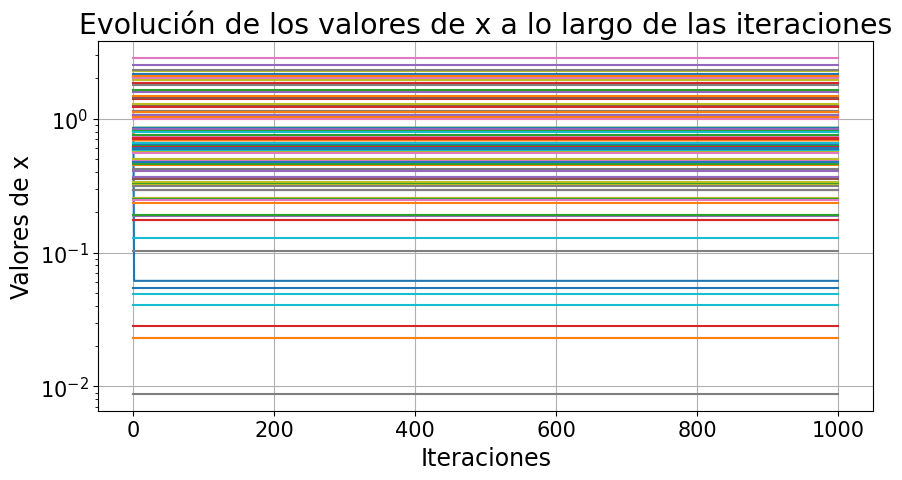

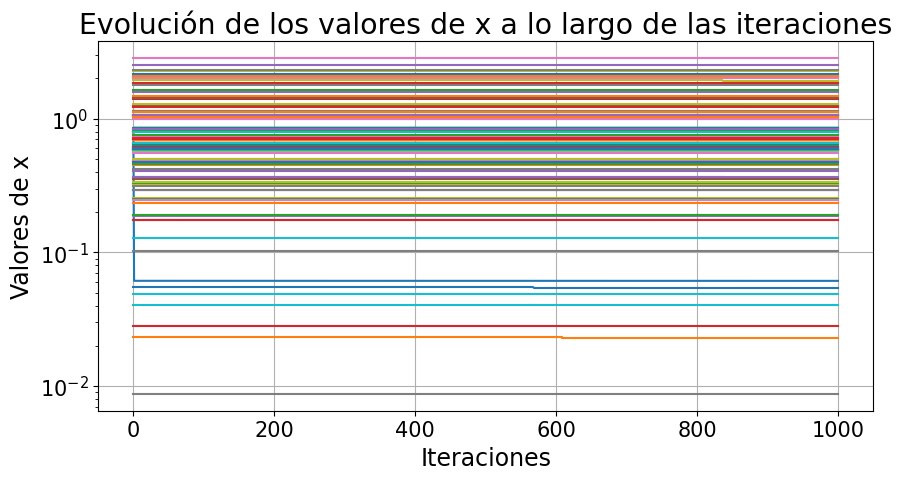

In [80]:


A = np.zeros((5, 100))
for i in range(5):
    for j in range(100):
        A[i, j] = 10 ** (i - j)

print(f"Condición de A: {condition_number(A)}")

F, grad_F, F2, grad_F2, s, delta2, cost_svd, norm_svd, deltas2 = initialize_problem(A)


plt.rcParams.update({'figure.figsize': (10,4.8)})
# plot_convergence_cost(x0, grad_F, F, s, iterations, delta2, F2, grad_F2, cost_svd)
# plot_convergence_norm(x0, grad_F, s, iterations, delta2, grad_F2, norm_svd,legend_size=13)
plot_convergence_x(x0, grad_F, s, iterations, delta2, grad_F2)
# plot_cost_with_different_delta2(x0, grad_F2, F2, s, iterations, deltas2)


Condición de A: 1.0


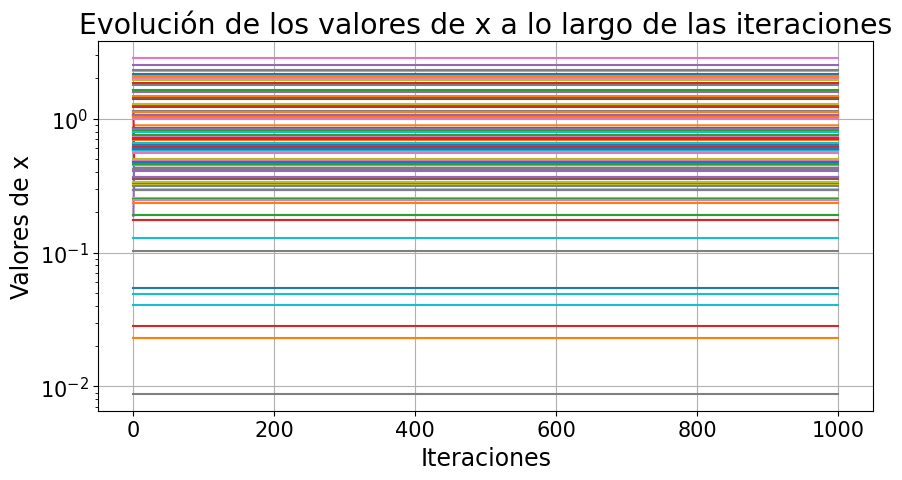

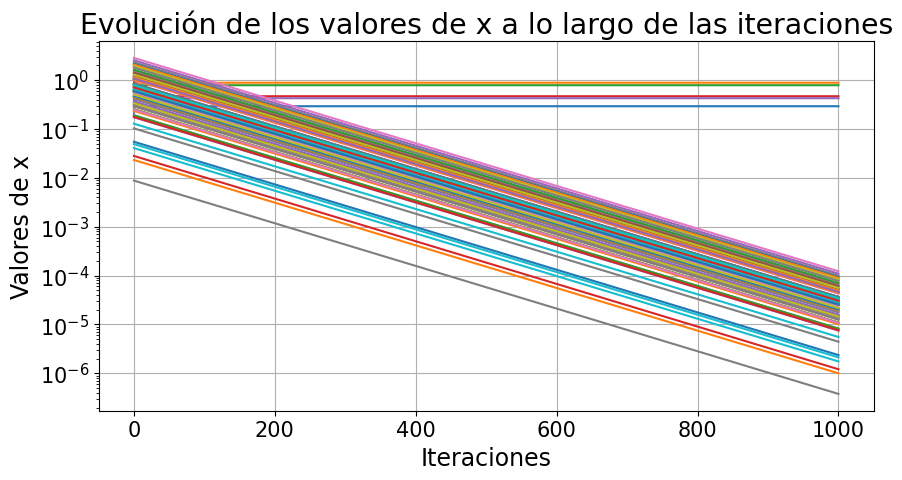

In [83]:
I = np.eye(n)
zeros = np.zeros((n, d - n))
A = np.hstack((I, zeros))
print(f"Condición de A: {condition_number(A)}")

F, grad_F, F2, grad_F2, s, delta2, cost_svd, norm_svd, deltas2 = initialize_problem(A)
plt.rcParams.update({'figure.figsize': (10,4.8)})
# plot_convergence_cost(x0, grad_F, F, s, iterations, delta2, F2, grad_F2, cost_svd)
# plot_convergence_norm(x0, grad_F, s, iterations, delta2, grad_F2, norm_svd)
plot_convergence_x(x0, grad_F, s, iterations, delta2, grad_F2)
# plot_cost_with_different_delta2(x0, grad_F2, F2, s, iterations, deltas2)

In [82]:
plt.rcParams.update({'figure.figsize': (10,5)})

A = np.random.randn(n, d)
print(f"Condición de A: {condition_number(A)}")

F, grad_F, F2, grad_F2, s, delta2, cost_svd, norm_svd, deltas2 = initialize_problem(A)

# plot_convergence_cost(x0, grad_F, F, s, iterations, delta2, F2, grad_F2, cost_svd)
# plot_convergence_norm(x0, grad_F, s, iterations, delta2, grad_F2, norm_svd,loc=(0,0))
# plot_convergence_x(x0, grad_F, s, iterations, delta2, grad_F2)
# plot_cost_with_different_delta2(x0, grad_F2, F2, s, iterations, deltas2)

Condición de A: 1.4181248732172183
